In [13]:
import pandas as pd
import numpy as np
import datetime
from data_processing import read_file, remove_features, extract_data_features, get_interval, get_subscriptn_rate, get_dayofweek, cat_name, dummify_catnames, get_week_number


import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df1 = read_file('../data/full_data.json')

In [53]:
df = remove_features(df1)
df = extract_data_features(df)
df = get_interval(df)
df = get_subscriptn_rate(df)
df = get_dayofweek(df)


In [54]:
df = cat_name(df)

In [55]:
df = dummify_catnames('cat_name', df)
df = get_week_number(df)

In [72]:
def get_outcome(df):
    df['outcome'] = df.status == 'successful'
    df = df.drop('status', axis=1)
    return df

In [71]:
xdf = df[['created_at','status','project_id',
 'creator_id','goal','pledged','spotlight',
 'staff_pick', 'launched_at','deadline','usd_pledged',
 'backers_count','static_usd_rate','state_changed_at','disable_communication',
 'days_to_launch','proj_live_days','subscription_rate','oversubscribed',
 'launched_dow','deadline_dow','cat_art','cat_comics',
 'cat_crafts','cat_dance', 'cat_design','cat_fashion',
 'cat_film & video','cat_food','cat_games',
 'cat_journalism','cat_music','cat_photography','cat_publishing',
 'cat_technology','cat_theater', 'week_num']]

In [41]:
import time
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold




/Users/lizsia/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
    kf = KFold(m, n_folds = num_folds)
    error = np.empty(num_folds)
    logreg = LogisticRegression()
    for train, test in kf:
        logreg.fit(features[train], target[train])
        pred = logreg.predict(features[test])
        error[index] = rmse(pred, target[test])
        index += 1

In [75]:

def split_data(df, test_size=0.3):
    '''
    Split data into training and testing sets. 
    '''
    y = df.pop('outcome').values
    X = df.values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test

In [76]:
X_train, X_test, y_train, y_test = split_data(xdf)

In [83]:
def train_model(clf, xt, yt):
    '''
    Trains model on training set.
    '''
    t0 = time.time()
    model = clf()
    t1 = time.time()
    print 'Modeling complete. Time taken: {}'.format(t1-t0)

    return model

# work in progress

In [332]:
#NOT DONE. exploring how the recency of successful campaigns affect likelihood of success
weekly =  df.groupby(['status','week_num']).size()
# len(df.id.unique()) # 6765
# weekly_success = weekly['success']

b = weekly.unstack(level = 0)
weekly_success = b.successful
# weekly_success
# weekly_success_diff = weekly_success.insert(0,111)



In [362]:
# non US countries
# andalusia = df[df.state == 'Andalusia'][['state', 'status', 'currency','goal','backers_count', 'cat_name', 'name','loc_type', 'country','subscription_rate' ]]

# df[df.country != 'US']['country']
# andalusia

,state,status,currency,goal,backers_count,cat_name,name,loc_type,country,subscription_rate
37693,Andalusia,successful,USD,13000,117,Tabletop Games,Alternative Civil War: 1861 - A Blackpowder & ...,Town,ES,1.0788
40978,Andalusia,successful,USD,45000,1752,Video Games,Crossing Souls: An Adventure Between Life and ...,Town,ES,1.1552
41063,Andalusia,successful,USD,8000,390,Video Games,A Hole New World,Town,ES,1.2289
42016,Andalusia,failed,USD,35000,197,Video Games,The Intergalactic Trashman,Town,ES,0.1739
54813,Andalusia,successful,USD,5000,38,World Music,"HERE NOW WORLD MUSIC PROJECT, 1st Edition GRAN...",Town,ES,1.0124
57737,Andalusia,failed,USD,3600,14,Places,The Study of Spanish Culture in Spain,Town,ES,0.1303


In [354]:
a =  df.groupby(['status','state']).size()
b = a.unstack(level = 0)
c = df.groupby('state').size()


In [328]:
def plot_weeknum(df):

    deadlinef = df.groupby(['status', 'week_num']).size()['failed']
    deadlines = df.groupby(['status', 'week_num']).size()['successful']


    x = np.arange(len(deadlinef))
#     y = np.arange(len(deadlines))

    plt.plot(x, deadlinef)
#     plt.plot(y, deadlines)
    plt.show()
    
    
    


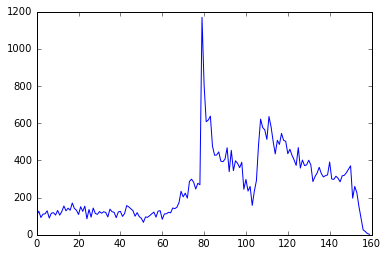

In [329]:
plot_weeknum(df)

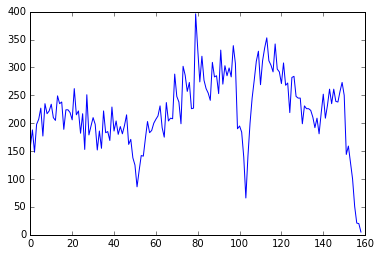

In [303]:
plot_weeknum(df)

In [151]:
# compare dow deadline
def plot_launchdow(df):

    deadlinef = df.groupby(['status','launched_dow']).size()['failed']
    deadlines = df.groupby(['status', 'launched_dow']).size()['successful']


    x = np.arange(7)
    plt.gca().set_color_cycle(['red', 'green'])

    plt.plot(x, deadlinef)
    plt.plot(x, deadlines)
    plt.show()

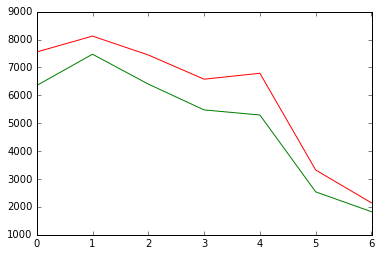

In [152]:
plot_launchdow(df)

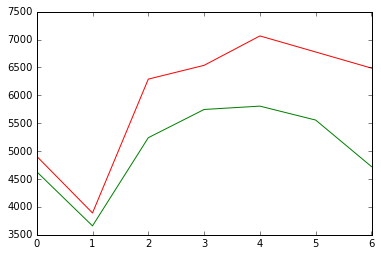

In [104]:
# compare dow deadline
def plot_deadlinedow(df):

    deadlinef = df.groupby(['highlvl_cat','status', 'deadline_dow']).size()['failed']
    deadlines = df.groupby(['highlvl_cat','status', 'deadline_dow']).size()['successful']


    x = np.arange(7)
    plt.gca().set_color_cycle(['red', 'green'])

    plt.plot(x, deadlinef)
    plt.plot(x, deadlines)
    plt.show()

In [149]:
a = df.groupby(['highlvl_cat','status', 'deadline_dow']).size()
b = a.unstack(level=0)
b

highlvl_cat              art  comics  crafts  dance  design  fashion  \
status     deadline_dow                                                
failed     0             495      93     115     29      93      402   
           1             404      87     127     31      71      289   
           2             563     116     217     36     130      533   
           3             589     111     206     35     140      582   
           4             655     114     216     51     148      571   
           5             620     110     190     44     128      554   
           6             589     114     197     27     133      499   
successful 0             376     134      43     44     385      138   
           1             335     126      45     52     275      105   
           2             426     186      60     48     393      185   
           3             431     147      70     46     514      212   
           4             507     169      66     52     521      190   
           5             489     186      64     65     420      173   
           6             424     130      51     45     346      143   

highlvl_cat              film & video  food  games  journalism  music  \
status     deadline_dow                                                 
failed     0                      664   484    250         108    608   
           1                      509   404    201          77    506   
           2                      764   670    329         151    746   
           3                      788   666    325         144    789   
           4                      838   762    347         157    844   
           5                      894   712    345         142    830   
           6                      818   689    313         151    840   
successful 0                      807   208    585          21    936   
           1                      641   141    437          23    714   
           2                      963   193    649          46    923   
           3                     1020   238    666          34   1038   
           4                     1031   225    636          40   1067   
           5                     1070   221    562          42   1086   
           6                      787   201    550          29   1024   

highlvl_cat              photography  publishing  technology  theater  
status     deadline_dow                                                
failed     0                     163         642         677       85  
           1                     125         498         495       67  
           2                     194         847         913       81  
           3                     220         867        1006       69  
           4                     235         929        1103       94  
           5                     212         913         970      112  
           6                     238         875         903      101  
successful 0                      78         522         254      100  
           1                      70         422         201       73  
           2                      81         633         325      129  
           3                      79         725         391      135  
           4                      88         718         368      128  
           5                      67         713         281      117  
           6                      70         567         253      102

In [330]:
df.loc[1000]

_id                                 {u'$oid': u'582a60d7edad9a1337c65179'}
created_at                                                      2014-11-23
data                     {u'disable_communication': False, u'creator': ...
id                                                                34165825
run_id                                Kickstarter_2016-01-28T09_15_08_781Z
status                                                              failed
project_id                                                       718427305
creator_id                                                       973582878
creator_name                                                  Krystal Cook
goal                                                                  8000
name                         Pottery and art studio takeover and expansion
slug                         pottery-and-art-studio-takeover-and-expansion
blurb                    As new owners of a pottery and art studio, we ...
pledged                  